In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.formula.api import logit
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss
plt.rc("font", size=14)

In [7]:
#-------------------------------------------------test-train split
df=pd.read_csv('I:/Thesis/Data/ninput1.csv')
print(df.head())
print(df.shape)
df.info()
df.describe().transpose()
y=df.iloc[:,66]
X=df.iloc[:,:66]
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3)
X_train.head
X_test.head()
y_train.head()
y_test.head()

     Age  Gender  Weight  Height  Marital.status  Chest.Pain  Syncope  \
0  0.671       1   0.315   0.754               2           1        0   
1  0.767       2   0.882   0.701               2           1        0   
2  0.630       1   0.252   0.701               2           1        0   
3  0.630       2   0.291   0.776               2           1        0   
4  0.795       2   0.134   0.701               3           1        0   

   Sweating  Killip  Requires.VT...VF.intervention  ...  Clexan  Integrilin  \
0         1       1                              0  ...       0           0   
1         0       2                              0  ...       0           0   
2         1       1                              0  ...       0           0   
3         1       1                              0  ...       0           0   
4         0       1                              0  ...       0           0   

   BetablockerH  ACEI  ARB  CCB  NitrateH  StatinH  Diuretics  \
0             1     1

51     0
172    1
89     0
127    0
334    1
Name: Patient.status.at.discharge, dtype: int64

In [8]:
#Lasoo feture selected.(42)
dfl=df.iloc[:,[0,2,3,5,8,10,11,12,13,14,16,17,19,20,21,23,24,27,28,29,30,31,32,33,34,35,36,37,38,39,41,43,47,49,51,53,54,57,59,62,64,66]]
print(dfl.shape)
dfl.info()
dfl.describe().transpose()

y=dfl.iloc[:,41]
X=dfl.iloc[:,:41]
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3)
X_train.head
X_test.head()
y_train.head()
y_test.head()

(500, 42)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          500 non-null    float64
 1   Weight                       500 non-null    float64
 2   Height                       500 non-null    float64
 3   Chest.Pain                   500 non-null    int64  
 4   Killip                       500 non-null    int64  
 5   Bradycardia.and.asystole     500 non-null    int64  
 6   Arrest.outside.the.hospital  500 non-null    int64  
 7   Systolic.blood.pressure      500 non-null    float64
 8   Diastolic.blood.pressure     500 non-null    float64
 9   Heart.rate.count             500 non-null    float64
 10  History.of.CABG              500 non-null    int64  
 11  History.of.PCI               500 non-null    int64  
 12  Current.dialysis             500 non-null    int64  
 13  Diabetes  

138    1
441    1
32     0
348    1
344    1
Name: Patient.status.at.discharge, dtype: int64

C:\Users\Sony\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[[-1.86411911 -1.27701245  1.53919504 -1.15192755 -1.2106376  -0.56851997
   1.25220516  0.51386957  1.06010138 -0.57810119 -0.20237781 -0.44828613
   0.7151469   0.14749819  0.14650265 -0.43404539  0.57669029  0.30250242
   0.4590847   0.26418994 -0.85306882  0.16681154 -0.73466829 -0.99626361
   0.27238706 -0.36152239 -0.2796228  -0.33019753 -0.77554751 -0.43119669
  -0.04122489  0.76644243 -0.41520817  0.69807877  0.04009276  0.38608026
   1.08028601  0.98812914  0.2964185   0.82528652  0.90566714]] [3.29913009]
0.9
0.8733333333333333
[[ 28  14]
 [  5 103]]
              precision    recall  f1-score   support

           0       0.85      0.67      0.75        42
           1       0.88      0.95      0.92       108

    accuracy                           0.87       150
   macro avg       0.86      0.81      0.83       150
weighted avg       0.87      0.87      0.87       150

Train/Test split results:
LogisticRegression accuracy is 0.873
LogisticRegression auc is 0.876


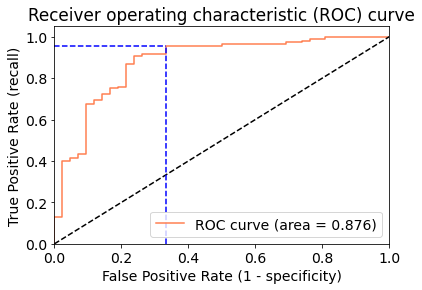

Using a threshold of 0.544 guarantees a sensitivity of 0.954 and a specificity of 0.667, i.e. a false positive rate of 33.33%.


In [9]:
#Logistic
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

logreg=LogisticRegression()
logreg.fit(X_train,y_train)
print(logreg.coef_, logreg.intercept_)

y_pred_proba_logreg = logreg.predict_proba(X_test)[:, 1]
y_pred_test_logreg = logreg.predict(X_test)

print(logreg.score(X_train,y_train))
print(logreg.score(X_test,y_test))

confusion_matrix = confusion_matrix(y_test, y_pred_test_logreg)
print(confusion_matrix)
print(classification_report(y_test, y_pred_test_logreg))

[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba_logreg)
print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred_test_logreg))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))


idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95
plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()
print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba_logreg)
auc = metrics.roc_auc_score(y_test, y_pred_proba_logreg)
plt.plot(fpr,tpr,label="LR, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [10]:
y_pred_train_logreg = logreg.predict(X_train)
np.savetxt("y_train_logreg.csv",y_pred_train_logreg)
np.savetxt("y_train_real_logreg.csv",y_train)
np.savetxt("X_train_real_logreg.csv",X_train)

y_pred_test_logreg = logreg.predict(X_test)
np.savetxt("y_test_logreg.csv",y_pred_test_logreg)
np.savetxt("y_test_real_logreg.csv",y_test)
np.savetxt("X_test_real_logreg.csv",X_test)

In [21]:
X_train.shape

(350, 41)

0.9685714285714285
0.8266666666666667
[[ 22  20]
 [  6 102]]
              precision    recall  f1-score   support

           0       0.79      0.52      0.63        42
           1       0.84      0.94      0.89       108

    accuracy                           0.83       150
   macro avg       0.81      0.73      0.76       150
weighted avg       0.82      0.83      0.81       150

Train/Test split results:
RandomForestClassifier accuracy is 0.827
RandomForestClassifier auc is 0.891


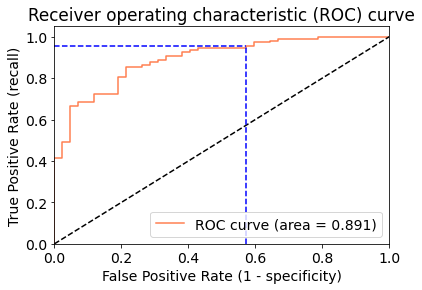

Using a threshold of 0.474 guarantees a sensitivity of 0.954 and a specificity of 0.429, i.e. a false positive rate of 57.14%.


In [11]:
#Random Forest
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

rf = RandomForestClassifier(n_estimators= 1100,min_samples_split=7 ,max_features = "auto", min_samples_leaf = 2,max_depth=1200,
                            criterion='gini').fit(X_train,y_train)

y_pred_train_rf = rf.predict(X_train)
y_pred_test_rf = rf.predict(X_test)

print(rf.score(X_train,y_train))
print(rf.score(X_test,y_test))

y_pred_proba_rf = rf.predict_proba(X_test)[:, 1]


confusion_matrix = confusion_matrix(y_test, y_pred_test_rf)
print(confusion_matrix)
print(classification_report(y_test, y_pred_test_rf))

[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba_rf)
print('Train/Test split results:')
print(rf.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred_test_rf))
print(rf.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95
plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()
print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))


In [12]:
y_pred_train_rf = rf.predict(X_train)
np.savetxt("y_train_rf.csv",y_pred_train_rf)
np.savetxt("y_train_real_rf.csv",y_train)


y_pred_test_rf = rf.predict(X_test)
np.savetxt("y_test_rf.csv",y_pred_test_rf)
np.savetxt("y_test_real_rf.csv",y_test)

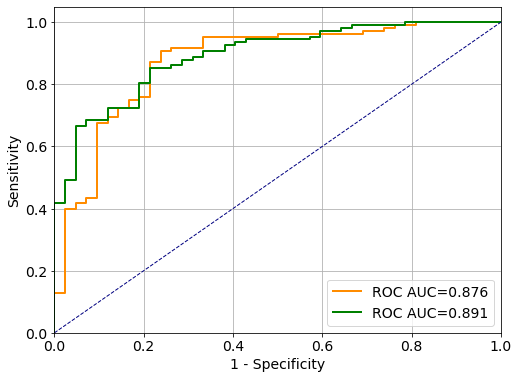

In [13]:
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

def roc_curve_and_score(y_test, pred_proba):
    fpr, tpr, _ = roc_curve(y_test.ravel(), pred_proba.ravel())
    roc_auc = roc_auc_score(y_test.ravel(), pred_proba.ravel())
    return fpr, tpr, roc_auc


plt.figure(figsize=(8, 6))
matplotlib.rcParams.update({'font.size': 14})
plt.grid()
fpr, tpr, roc_auc = roc_curve_and_score(y_test, y_pred_proba_logreg)
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label='ROC AUC={0:.3f}'.format(roc_auc))
fpr, tpr, roc_auc = roc_curve_and_score(y_test, y_pred_proba_rf)
plt.plot(fpr, tpr, color='green', lw=2,
         label='ROC AUC={0:.3f}'.format(roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.legend(loc="lower right")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.show()


In [14]:
#Random Forest feture selected.(42)
dfrf=df.iloc[:,[8,0,30,38,33,32,13,12,3,39,37,14,2,31,36,59,34,35,64,54,23,21,49,51,22,43,1,9,10,17,65,46,47,61,7,15,18,41,20,19,52,66]]
print(dfrf.shape)
dfrf.info()
dfrf.describe().transpose()

y=dfrf.iloc[:,41]
X=dfrf.iloc[:,:41]
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3)
X_train.head
X_test.head()
y_train.head()
y_test.head()

(500, 42)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 42 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Killip                         500 non-null    int64  
 1   Age                            500 non-null    float64
 2   Creatinine                     500 non-null    float64
 3   BUN                            500 non-null    float64
 4   BS                             500 non-null    float64
 5   FBS                            500 non-null    float64
 6   Diastolic.blood.pressure       500 non-null    float64
 7   Systolic.blood.pressure        500 non-null    float64
 8   Height                         500 non-null    float64
 9   BloodGroup                     500 non-null    int64  
 10  HDL.Cholestrol                 500 non-null    float64
 11  Heart.rate.count               500 non-null    float64
 12  Weight                         500 non-n

35     0
151    1
347    1
32     0
76     0
Name: Patient.status.at.discharge, dtype: int64

[[-0.54911471 -2.25116683 -0.63736712 -0.85831041 -1.07903487 -0.93278034
   0.92194042  0.33857928  0.68491044 -0.2118142  -0.63818726 -1.40052447
  -1.0811656   0.19237214 -0.98186295  0.77463768 -0.0296011   0.54749427
   1.14745692  1.07863074 -0.47578192  0.15428972  0.51428936 -0.23081521
  -0.16219098  0.92995069 -0.12502545  0.20313206 -0.03200483 -0.21163613
   0.04881795 -0.20835666 -0.67925996 -0.12661035 -0.34739939 -0.11614395
   0.47552484  0.10638723  0.17563934  0.22851239  0.28573675]] [1.09590364]
0.8685714285714285
0.86
[[ 25  14]
 [  7 104]]
              precision    recall  f1-score   support

           0       0.78      0.64      0.70        39
           1       0.88      0.94      0.91       111

    accuracy                           0.86       150
   macro avg       0.83      0.79      0.81       150
weighted avg       0.86      0.86      0.86       150

Train/Test split results:
LogisticRegression accuracy is 0.860
LogisticRegression auc is 0.927


C:\Users\Sony\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


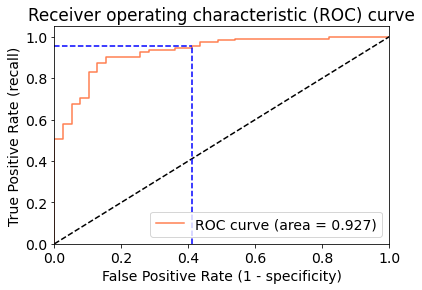

Using a threshold of 0.458 guarantees a sensitivity of 0.955 and a specificity of 0.590, i.e. a false positive rate of 41.03%.


In [15]:
#Logistic
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

logreg=LogisticRegression()
logreg.fit(X_train,y_train)
print(logreg.coef_, logreg.intercept_)

y_pred_proba_logreg = logreg.predict_proba(X_test)[:, 1]
y_pred_test_logreg = logreg.predict(X_test)

print(logreg.score(X_train,y_train))
print(logreg.score(X_test,y_test))

confusion_matrix = confusion_matrix(y_test, y_pred_test_logreg)
print(confusion_matrix)
print(classification_report(y_test, y_pred_test_logreg))

[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba_logreg)
print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred_test_logreg))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))


idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95
plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()
print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

In [16]:
rf_y_pred_train_logreg = logreg.predict(X_train)
np.savetxt("rf_y_train_logreg.csv",rf_y_pred_train_logreg)
np.savetxt("rf_y_train_real_logreg.csv",y_train)
np.savetxt("rf_X_train_real_logreg.csv",X_train)

rf_y_pred_test_logreg = logreg.predict(X_test)
np.savetxt("rf_y_test_logreg.csv",rf_y_pred_test_logreg)
np.savetxt("rf_y_test_real_logreg.csv",y_test)
np.savetxt("rf_X_test_real_logreg.csv",X_test)

0.9628571428571429
0.8466666666666667
[[ 23  16]
 [  7 104]]
              precision    recall  f1-score   support

           0       0.77      0.59      0.67        39
           1       0.87      0.94      0.90       111

    accuracy                           0.85       150
   macro avg       0.82      0.76      0.78       150
weighted avg       0.84      0.85      0.84       150

Train/Test split results:
RandomForestClassifier accuracy is 0.847
RandomForestClassifier auc is 0.911


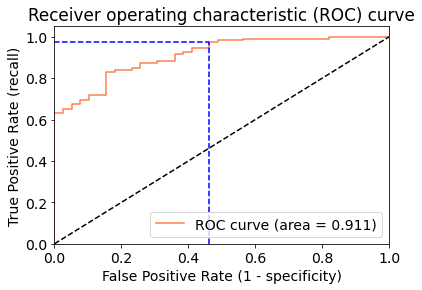

Using a threshold of 0.441 guarantees a sensitivity of 0.973 and a specificity of 0.538, i.e. a false positive rate of 46.15%.


In [17]:
#Random Forest
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

rf = RandomForestClassifier(n_estimators= 1100,min_samples_split=7 ,max_features = "auto", min_samples_leaf = 2,max_depth=1200,
                            criterion='gini').fit(X_train,y_train)

y_pred_train_rf = rf.predict(X_train)
y_pred_test_rf = rf.predict(X_test)

print(rf.score(X_train,y_train))
print(rf.score(X_test,y_test))

y_pred_proba_rf = rf.predict_proba(X_test)[:, 1]


confusion_matrix = confusion_matrix(y_test, y_pred_test_rf)
print(confusion_matrix)
print(classification_report(y_test, y_pred_test_rf))

[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba_rf)
print('Train/Test split results:')
print(rf.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred_test_rf))
print(rf.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95
plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()
print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))


In [18]:
rf_y_pred_train_rf = rf.predict(X_train)
np.savetxt("rf_y_train_rf.csv",rf_y_pred_train_rf)
np.savetxt("rf_y_train_real_rf.csv",y_train)

rf_y_pred_test_rf = rf.predict(X_test)
np.savetxt("rf_y_test_rf.csv",rf_y_pred_test_rf)
np.savetxt("rf_y_test_real_rf.csv",y_test)

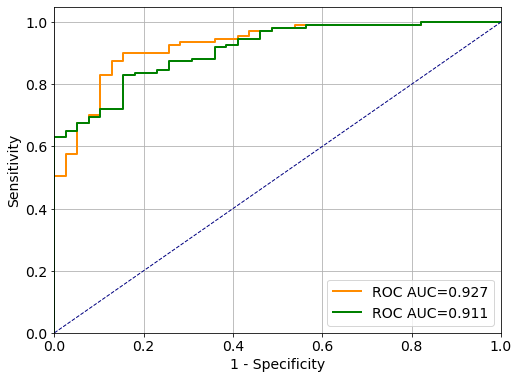

In [19]:
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

def roc_curve_and_score(y_test, pred_proba):
    fpr, tpr, _ = roc_curve(y_test.ravel(), pred_proba.ravel())
    roc_auc = roc_auc_score(y_test.ravel(), pred_proba.ravel())
    return fpr, tpr, roc_auc


plt.figure(figsize=(8, 6))
matplotlib.rcParams.update({'font.size': 14})
plt.grid()
fpr, tpr, roc_auc = roc_curve_and_score(y_test, y_pred_proba_logreg)
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label='ROC AUC={0:.3f}'.format(roc_auc))
fpr, tpr, roc_auc = roc_curve_and_score(y_test, y_pred_proba_rf)
plt.plot(fpr, tpr, color='green', lw=2,
         label='ROC AUC={0:.3f}'.format(roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.legend(loc="lower right")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.show()


In [ ]:
# ----------------------------------------------------------Logistic Regression-----------------------
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary())

logreg=LogisticRegression()
logreg.fit(X_train,y_train)
print(logreg.coef_, logreg.intercept_)

y_pred_train = logreg.predict(X_train)
np.savetxt("y_train.csv",y_pred_train)

y_pred_test = logreg.predict(X_test)
np.savetxt("y_test.csv",y_pred_test)

y_pred_proba = logreg.predict_proba(X_test)[:, 1]


[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred_test))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))
logreg.score(X_train,y_train)
logreg.score(X_test,y_test)

idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95
plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()
print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))


confusion_matrix = confusion_matrix(y_test, y_pred_test)
print(confusion_matrix)
print(classification_report(y_test, y_pred_test))

y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
#-------------------------------------------------------Random Forest-------------------------------------
from sklearn.metrics import roc_auc_score
rf=RandomForestClassifier()
#n_estimators=100,oob_score=True,max_features='auto',bootstrap=True
rf.fit(X_train,y_train)
rf_predictions = rf.predict(X_test)
rf_pred_proba = rf.predict_proba(X_test)[:, 1]
roc_value = roc_auc_score(y_test, rf_pred_proba)
print(roc_value)

from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train,y_train)
rf_random.best_params_
#evalute
def evaluate(model, X_test, y_test):
    predictions = model.predict(X_test)
    errors = abs(predictions - y_test)
    mape = 100 * np.mean(errors / y_test)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    return accuracy

base_model = RandomForestClassifier(n_estimators = 10, random_state = 42)
base_model.fit(X_train,y_train)
base_accuracy = evaluate(base_model, X_test,y_test)

best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test,y_test)

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [False],
    'max_depth': [20,30,40,50,60],
    'max_features': ['auto'],
    'min_samples_leaf': [1,2,3, 4, 5],
    'min_samples_split': [2,4,6, 8, 10],
    'n_estimators': [100, 200, 300,400 ,500,600,700,800,900,1000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
# Fit the grid search to the data
grid_search.fit(X_train,y_train)
grid_search.best_params_

best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)

print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))


#-------------------------------------------------------Random Forest------------------------------------
model = RandomForestClassifier(n_estimators=400).fit(X_train,y_train)
predictionforest = model.predict(X_test)
print(confusion_matrix(y_test,predictionforest))
print(classification_report(y_test,predictionforest))
#--------------------------------Base--------
model = RandomForestClassifier(random_state= 101).fit(X_train,y_train)
predictionforest = model.predict(X_test)
print(confusion_matrix(y_test,predictionforest))
print(classification_report(y_test,predictionforest))
acc1 = accuracy_score(y_test,predictionforest)

#-----------------------------Manual Search-------
#The main parameters used by a Random Forest Classifier are:

#1-criterion = the function used to evaluate the quality of a split.
#2-max_depth = maximum number of levels allowed in each tree.
#3-max_features = maximum number of features considered when splitting a node.
#4-min_samples_leaf = minimum number of samples which can be stored in a tree leaf.
#5-min_samples_split = minimum number of samples necessary in a node to cause node splitting.
#6-n_estimators = number of trees in the ensamble.

model = RandomForestClassifier(n_estimators=10, random_state= 101).fit(X_train,y_train)
predictionforest = model.predict(X_test)
print(confusion_matrix(y_test,predictionforest))
print(classification_report(y_test,predictionforest))
acc2 = accuracy_score(y_test,predictionforest)

model = RandomForestClassifier(n_estimators= 986, max_features = "log2", min_samples_leaf = 5,
                               random_state= 101).fit(X_train,y_train)
predictionforest = model.predict(X_test)
print(confusion_matrix(y_test,predictionforest))
print(classification_report(y_test,predictionforest))

#-----------------------------------------1-Random Search----------------------
#In Random Search, we create a grid of hyperparameters and train/test our model on just some random combination of these hyperparameters.
from sklearn.model_selection import RandomizedSearchCV
random_search = {
               'max_features': ['auto', 'sqrt','log2', None],
               'n_estimators': list(np.linspace(151, 1200, 10, dtype = int))}
print(random_search)

clf = RandomForestClassifier()
model = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter = 80, 
                               cv = 4, verbose= 5, random_state= 101, n_jobs = -1)
model.fit(X_train,y_train)

import seaborn as sns
table = pd.pivot_table(pd.DataFrame(model.cv_results_),
    values='mean_test_score', index='param_n_estimators', columns='param_max_features')     
sns.heatmap(table)
#Chaning evaluation metric from Accuracy to Area Under the Curve (AUC).
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_auc_score
def auc_metric(true, pred):
    auc_score = roc_auc_score(pred, true)    
    return auc_score
metric = make_scorer(auc_metric, greater_is_better=True)

clf = RandomForestClassifier()
model = RandomizedSearchCV(estimator = clf, param_distributions = random_search,  
                               n_iter = 80, cv = 4, verbose= 5, random_state= 101, 
                               n_jobs = -1, scoring = metric)

model.fit(X_train,y_train)
n_estimators, max_features = list(np.linspace(151, 1200, 10, dtype = int)), ['auto', 'sqrt','log2', None]
res = model.cv_results_['mean_test_score'].reshape(len(n_estimators), len(max_features))

table = pd.pivot_table(pd.DataFrame(model.cv_results_), 
                       values='mean_test_score', index='param_n_estimators', columns='param_max_features')
     
sns.heatmap(table)
plt.title("Using Area Under the Curve instead of Accuracy as evaluation metric")

from sklearn.model_selection import GridSearchCV
#Visualizing how cross validation accuracy changes varying the number of estimators and maximum features.
from matplotlib.pyplot import figure
def search_plot(grid, param1, param2, name1, name2):

    grid = grid.cv_results_
    scores_mean = grid['mean_test_score']
    scores_mean = np.array(scores_mean).reshape(len(param2),len(param1))

    figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
    for idx, val in enumerate(param2):
        plt.plot(param1, scores_mean[idx,:], '-o', label= name2 + ': ' + str(val))

    plt.title("Random Search Accuracy", fontsize=15)
    plt.xlabel(name1, fontsize=12)
    plt.ylabel('Cross-Validation Average Accuracy', fontsize=12)
    plt.legend(loc="best", fontsize=12)
    plt.grid('on')
    
search_plot(model, n_estimators, max_features, 'Estimators Number', 'Max Features')

import numbers

def plot_grid_search_validation_curve(grid, param_to_vary, title='Validation Accuracy Curve', ylim=None,
                                      xlim=None, log=None):

    df_cv_results = pd.DataFrame(grid.cv_results_)
    valid_scores_mean = df_cv_results['mean_test_score']
    valid_scores_std = df_cv_results['std_test_score']

    param_cols = [c for c in df_cv_results.columns if c[:6] == 'param_']
    param_ranges = [grid.param_distributions[p[6:]] for p in param_cols]
    param_ranges_lengths = [len(pr) for pr in param_ranges]

    valid_scores_mean = np.array(valid_scores_mean).reshape(*param_ranges_lengths)
    valid_scores_std = np.array(valid_scores_std).reshape(*param_ranges_lengths)

    param_to_vary_idx = param_cols.index('param_{}'.format(param_to_vary))

    slices = []
    for idx, param in enumerate(grid.best_params_):
        if (idx == param_to_vary_idx):
            slices.append(slice(None))
            continue
        best_param_val = grid.best_params_[param]
        idx_of_best_param = 0
        if isinstance(param_ranges[idx], np.ndarray):
            idx_of_best_param = param_ranges[idx].tolist().index(best_param_val)
        else:
            idx_of_best_param = param_ranges[idx].index(best_param_val)
        slices.append(idx_of_best_param)

    valid_scores_mean = valid_scores_mean[tuple(slices)]
    valid_scores_std = valid_scores_std[tuple(slices)]

    plt.clf()
    plt.title(title)
    plt.xlabel(param_to_vary)
    plt.ylabel('Score')

    if (ylim is None):
        plt.ylim(0.0, 1.1)
    else:
        plt.ylim(*ylim)
    if (not (xlim is None)):
        plt.xlim(*xlim)
        
    lw = 2
    plot_fn = plt.plot
    if log:
        plot_fn = plt.semilogx
        param_range = param_ranges[param_to_vary_idx]
    if (not isinstance(param_range[0], numbers.Number)):
        param_range = [str(x) for x in param_range]
    plot_fn(param_range, valid_scores_mean, label='Cross-Validation Accuracy',
            color='b', lw=lw)
    plt.fill_between(param_range, valid_scores_mean - valid_scores_std,
                     valid_scores_mean + valid_scores_std, alpha=0.1,
                     color='b', lw=lw)
    plt.legend(loc='lower right')
    plt.show()

plot_grid_search_validation_curve(model, 'n_estimators', log=True, ylim=(.75, 0.90))

#Complete Random Search
random_search = {'criterion': ['entropy', 'gini'],
               'max_depth': list(np.linspace(10, 1200, 10, dtype = int)) + [None],
               'max_features': ['auto', 'sqrt','log2', None],
               'min_samples_leaf': [4, 6, 8, 12],
               'min_samples_split': [5, 7, 10, 14],
               'n_estimators': list(np.linspace(151, 1200, 10, dtype = int))}

clf = RandomForestClassifier()
model = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter = 80, 
                               cv = 4, verbose= 5, random_state= 101, n_jobs = -1)
model.fit(X_train,y_train)

model.best_params_

table = pd.pivot_table(pd.DataFrame(model.cv_results_),
    values='mean_test_score', index='param_max_depth', columns='param_min_samples_split')
sns.heatmap(table)

table = pd.pivot_table(pd.DataFrame(model.cv_results_),
    values='mean_test_score', index='param_max_depth', columns='param_min_samples_leaf')
sns.heatmap(table)

table = pd.pivot_table(pd.DataFrame(model.cv_results_),
    values='mean_test_score', index='param_n_estimators', columns='param_criterion')
sns.heatmap(table)

predictionforest = model.best_estimator_.predict(X_test)
print(confusion_matrix(y_test,predictionforest))
print(classification_report(y_test,predictionforest))
acc3 = accuracy_score(y_test,predictionforest)

df = pd.DataFrame.from_dict(model.cv_results_)
df['param_min_samples_leaf'] = df['param_min_samples_leaf'].astype(float)
df['param_n_estimators'] = df['param_n_estimators'].astype(float)
df['param_min_samples_split'] = df['param_min_samples_split'].astype(float)
df['mean_fit_time'] = df['mean_fit_time'].astype(float)
df['mean_test_score'] = df['mean_test_score'].astype(float)
df.head()

#---------------------------------------------------2-Grid Search-----------------------
from sklearn.model_selection import GridSearchCV

grid_search = {
    'criterion': [model.best_params_['criterion']],
    'max_depth': [model.best_params_['max_depth']],
    'max_features': [model.best_params_['max_features']],
    'min_samples_leaf': [model.best_params_['min_samples_leaf'] - 2, 
                         model.best_params_['min_samples_leaf'], 
                         model.best_params_['min_samples_leaf'] + 2],
    'min_samples_split': [model.best_params_['min_samples_split'] - 3, 
                          model.best_params_['min_samples_split'], 
                          model.best_params_['min_samples_split'] + 3],
    'n_estimators': [model.best_params_['n_estimators'] - 150, model.best_params_['n_estimators'] - 100, 
                     model.best_params_['n_estimators'], 
                     model.best_params_['n_estimators'] + 100, model.best_params_['n_estimators'] + 150]
}

print(grid_search)

clf = RandomForestClassifier()
model = GridSearchCV(estimator = clf, param_grid = grid_search, 
                               cv = 4, verbose= 5, n_jobs = -1)
model.fit(X_train,y_train)

model.best_params_

predictionforest = model.best_estimator_.predict(X_test)
print(confusion_matrix(y_test,predictionforest))
print(classification_report(y_test,predictionforest))
acc4 = accuracy_score(y_test,predictionforest)

print('Base Accuracy vs Manual Search {:0.4f}%.'.format( 100 * (acc2 - acc1) / acc1))
print('Base Accuracy vs Random Search {:0.4f}%.'.format( 100 * (acc3 - acc1) / acc1))
print('Base Accuracy vs Grid Search {:0.4f}%.'.format( 100 * (acc4 - acc1) / acc1))


In [10]:
#---------------------------------------------------Lasoo------------------------------------------------
from sklearn.linear_model import Lasso, LassoCV
from sklearn.metrics import mean_squared_error



In [ ]:
alphas = 10**np.linspace(6,-2,50)*0.5
alphas
lasso = Lasso(max_iter=10000, normalize=True)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)
    
np.shape(coefs)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

lassocv = LassoCV(alphas=None, cv=10, max_iter=100000, normalize=True)
lassocv.fit(X_train, y_train)
lasso.set_params(alpha=lassocv.alpha_)
print("Alpha=", lassocv.alpha_)
lasso.fit(X_train, y_train)
print("mse = ",mean_squared_error(y_test, lasso.predict(X_test)))
print("best model coefficients:")
pd.Series(lasso.coef_, index=X.columns)

predictionlasso = lassocv.best_estimator_.predict(X_test)
print(confusion_matrix(y_test,predictionlasso))
print(classification_report(y_test,predictionlasso))
lasso.

In [7]:
#regulized logistic regression-feture selection
from sklearn.linear_model import Lasso, LogisticRegression
clf = LogisticRegression(penalty="l1",solver='liblinear')
clf.fit(X_train,y_train)
thetaLasso=clf.coef_
print("The regularized theta using lasso regression:\n",thetaLasso.reshape(66,1))

The regularized theta using lasso regression:
 [[-5.85626981e-02]
 [ 0.00000000e+00]
 [-4.25050398e-02]
 [ 5.12220902e-02]
 [ 0.00000000e+00]
 [-1.49653437e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-9.33673862e-01]
 [ 0.00000000e+00]
 [-3.20705938e-01]
 [ 2.64246897e+00]
 [ 1.17696632e-02]
 [ 1.15660290e-02]
 [-5.20218549e-03]
 [ 0.00000000e+00]
 [-1.27771558e-01]
 [-1.07353873e+00]
 [ 0.00000000e+00]
 [ 1.03234575e+00]
 [ 2.27088917e-01]
 [ 7.34870152e-01]
 [ 0.00000000e+00]
 [-3.43597397e-01]
 [ 2.20035685e-01]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 1.06072277e+00]
 [ 1.17523206e-01]
 [-7.35950990e-01]
 [-4.15946243e-01]
 [ 8.27989301e-03]
 [-2.87834332e-03]
 [-2.34896294e-03]
 [ 1.35400028e-02]
 [-5.33779349e-03]
 [-1.22755769e-02]
 [-2.02847457e-02]
 [-1.05766332e-02]
 [-4.32047804e-01]
 [ 0.00000000e+00]
 [ 6.64797730e-01]
 [ 0.00000000e+00]
 [ 7.38626513e-01]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-1.00570418e-01]
 [ 0.00000000e+00]
 [ 6.72687876e-01]
 [ 

In [10]:
#Random Forest-Feature Importance
rf = RandomForestClassifier(n_estimators= 1100,min_samples_split=7 ,max_features = "auto", min_samples_leaf = 2,max_depth=1200,
                            criterion='gini').fit(X_train,y_train)


In [13]:
rf.feature_importances_

array([0.08489305, 0.00725407, 0.0298982 , 0.03872619, 0.00165668,
       0.00130737, 0.00265678, 0.00415149, 0.1036935 , 0.00590586,
       0.00590128, 0.00103143, 0.03994461, 0.04139459, 0.03017864,
       0.00412893, 0.00149796, 0.00583352, 0.00403196, 0.00365658,
       0.00365911, 0.01317202, 0.00746235, 0.01462853, 0.00195511,
       0.        , 0.00147555, 0.00252083, 0.0022843 , 0.00249698,
       0.07616752, 0.02928788, 0.04244448, 0.04619569, 0.02420868,
       0.02399681, 0.02580979, 0.03195599, 0.06380031, 0.03276531,
       0.00228068, 0.0036767 , 0.00207696, 0.0074454 , 0.00181452,
       0.0018509 , 0.00437379, 0.00435512, 0.00272771, 0.00877057,
       0.00174653, 0.00779483, 0.00315793, 0.00203314, 0.01685327,
       0.00306086, 0.00165681, 0.00195932, 0.0002682 , 0.02540146,
       0.00109551, 0.00417579, 0.00183852, 0.00258763, 0.01751613,
       0.00545179])

In [17]:
print (pd.DataFrame(rf.feature_importances_,index=df.columns[:-1],columns=['Mean Decrease in Gini']))

                Mean Decrease in Gini
Age                          0.084893
Gender                       0.007254
Weight                       0.029898
Height                       0.038726
Marital.status               0.001657
...                               ...
ARB                          0.004176
CCB                          0.001839
NitrateH                     0.002588
StatinH                      0.017516
Diuretics                    0.005452

[66 rows x 1 columns]
